In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [189]:
# 아래와 같은 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터 가 있다 

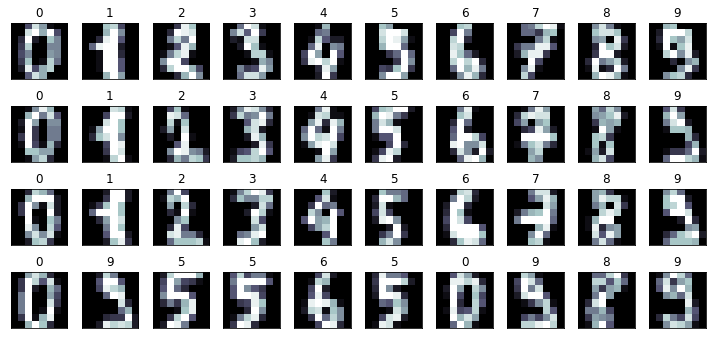

In [3]:
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

In [ ]:
# df를 다음과 같이 저장하고 
# 종속 변수는 target =y
# 독립 변수는 target을 제외한 나머지 값들이다. =X

In [4]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
sy = pd.Series(digits.target, dtype="category")
sy = sy.cat.rename_categories(digits.target_names)
df['target'] = sy
df.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [ ]:
# 문제 1번 
# 해당 데이터를 train data 와 test data 로 나누어라 (8:2)

In [6]:
# code
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
# 문제 2번
# GBM 알고리즘을 사용하여 ACC score를 구하여라
# 파라미터는 자유


In [9]:
# code
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('Accuracy : ', accuracy_score(y_test, gb_pred))

Accuracy :  0.9666666666666667


In [2]:
# 문제 3번
# xgb 부스트를 사용하여서 acc score을 구하여라 
# v파라미터는 자유 

In [11]:
# code
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depths=3)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print('Accuracy : ', accuracy_score(y_test, xgb_pred))

[17:06:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_depths } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy :  0.9694444444444444


In [4]:
# 문제 4번
# light bgm 을 사용하여서 acc score 을 구하여라
# 파라미터는 자유


In [15]:
# code
from lightgbm import LGBMClassifier

evals = [(X_test.values, y_test)]

lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train.values, y_train, early_stopping_rounds=100, eval_set=evals)
lgbm_pred = lgbm.predict(X_test)

print('Accuracy : ', accuracy_score(y_test, lgbm_pred))

[1]	valid_0's multi_logloss: 1.67784
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.37477
[3]	valid_0's multi_logloss: 1.15448
[4]	valid_0's multi_logloss: 0.993
[5]	valid_0's multi_logloss: 0.861099
[6]	valid_0's multi_logloss: 0.755848
[7]	valid_0's multi_logloss: 0.668409
[8]	valid_0's multi_logloss: 0.590853
[9]	valid_0's multi_logloss: 0.531668
[10]	valid_0's multi_logloss: 0.479699
[11]	valid_0's multi_logloss: 0.434274
[12]	valid_0's multi_logloss: 0.395193
[13]	valid_0's multi_logloss: 0.359839
[14]	valid_0's multi_logloss: 0.328051
[15]	valid_0's multi_logloss: 0.300333
[16]	valid_0's multi_logloss: 0.27462
[17]	valid_0's multi_logloss: 0.25398
[18]	valid_0's multi_logloss: 0.234383
[19]	valid_0's multi_logloss: 0.218995
[20]	valid_0's multi_logloss: 0.20415
[21]	valid_0's multi_logloss: 0.192404
[22]	valid_0's multi_logloss: 0.181361
[23]	valid_0's multi_logloss: 0.172771
[24]	valid_0's multi_logloss: 0.162429
[25]	valid_0's multi